In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#from InterNetwork import set_seed, Leg_Setup, NN_run, NN_results, Get_Num_Legs
from InterNetwork import *
from datetime import datetime
import numpy as np

from matplotlib import rc
rc("font", family="serif", size=14)
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1, l2
import pickle
from shutil import copyfile

import smtplib, ssl
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

from neuralStellar2 import stellarGrid,NNmodel
#tf.compat.v1.enable_eager_execution()

config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)
config.gpu_options.allow_growth = True

#import sys
#sys.path.append('/content/drive/My Drive/UoB physics/year 4/FYP')
#consider decreasing the learning rate the step after 0.001
"""
preventing disconnect
1. ctrl+shift+i
2. go to console
3. go to the bottom and paste:
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

4. hit enter
"""

Using TensorFlow backend.


'\npreventing disconnect\n1. ctrl+shift+i\n2. go to console\n3. go to the bottom and paste:\nfunction ClickConnect(){\nconsole.log("Working"); \ndocument.querySelector("colab-toolbar-button#connect").click() \n}\nsetInterval(ClickConnect,60000)\n\n4. hit enter\n'

In [0]:
folder_name = 'test3'
load_partially_trained_model = False
recompile = False #recompile rules: 1. if not list: it will always set whether to recompile to that value, 2. if list: each leg will recompile based on the corresponding recompile list elemnt, 3. if list is shorter than no. legs: for legs with indeces greater than the list, those legs will be set to not recompile unless otherwise instructed, 4. if recompile gives a leg False to but other parameter changes require it to recompile it will still recompile.
load_RGB_only = "EarlyType"
#load_RGB_only = True
poly_degree = 0 #the degree of the polynomial used to fit the RGB to scale the radius. If None or 0: skips radius scaling

hidden_layers = ['bn']+[156]*8+[256]*2
#hidden_layers = [80]*7
activation = 'elu'
mean_error_type = 'MAE'

dropout = None
decay = None
momentum = 0 #between 0 and 1, setting momentum as 0 right now doesn't effect NAdam

opt = 'Nadam'
#opt = ['Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','Nadam']
#reg = None
reg = [['l2',1E-6]]
#reg = [['l2',1E-5],['l2',1E-5],['l2',1E-5],['l2',1E-6],['l2',1E-6],['l2',1E-6],None,None,None,None]

epoch_no = [100,100,100,300,3000,3000,3000,3000,3000,8000]
#epoch_no = [400,400,400,600,10000,6000,6000,6000,10000]
#epoch_no = [400,800,800,800,10000,10000,10000,10000,15000,15000] #experimental epochs
#lr = [0.0001,0.0002,0.0005,0.001] #standard pipeline, you can now pass lr 'prev' so that it recompiles using the _decayed_lr from the previous leg
lr = [0.0001,0.0002,0.0005,0.001,'prev']
#batch_size = [1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000]
batch_size = [200,400,1000,2000,4000,10000,20000,40000,100000,200000]
#EarlyType points = 297088

297088
leg: 1/10
epochs of leg: 100, optimizer: Nadam, activation: elu
learning rate: 0.0001, batch size: 200, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
Model: "neuralstellar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 156)               936       
_________________________________________________________________
dense_12 (Dense)             (None, 156)               24492     
_________________________________________________________________
dense_13 (Dense)             (None, 156)               24492     
_________________________________________________________________
dense_1

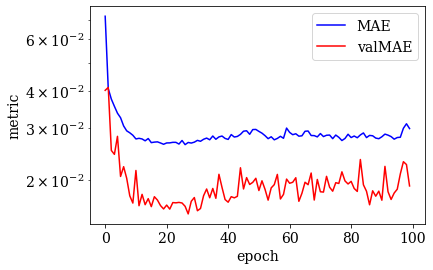

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


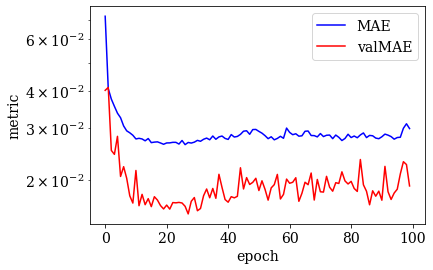

found 2546 stars.
60000/60000 - 0s


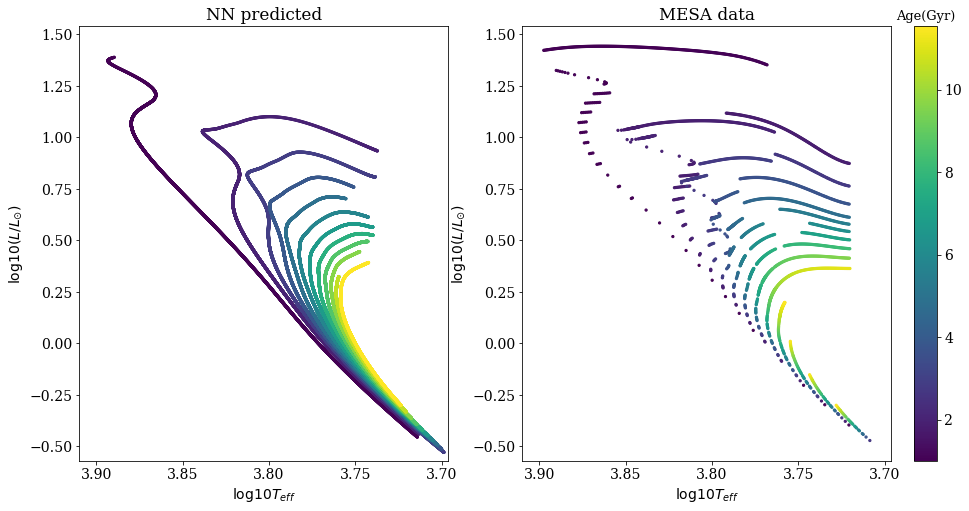

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.0298224
leg: 2/10
epochs of leg: 100, optimizer: Nadam, activation: elu
learning rate: 0.0002, batch size: 400, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 13:03:47.692827 | Time elapsed=0:07:13.834407


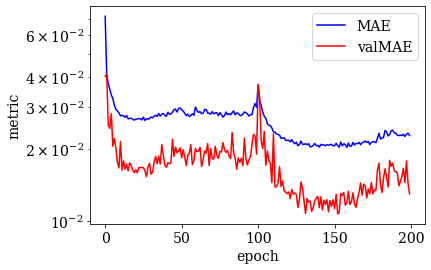

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


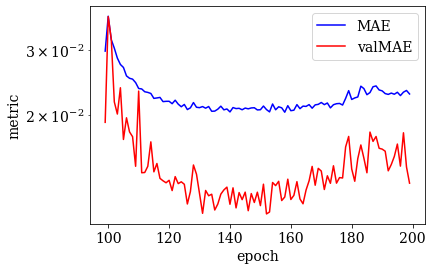

found 2546 stars.
60000/60000 - 0s


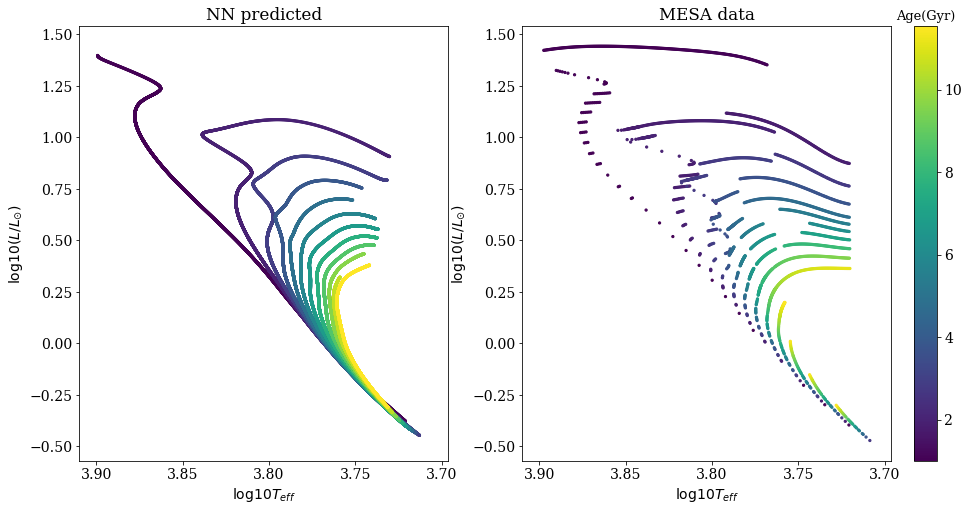

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.02276538
leg: 3/10
epochs of leg: 100, optimizer: Nadam, activation: elu
learning rate: 0.0005, batch size: 1000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 13:07:07.174435 | Time elapsed=0:03:03.243892


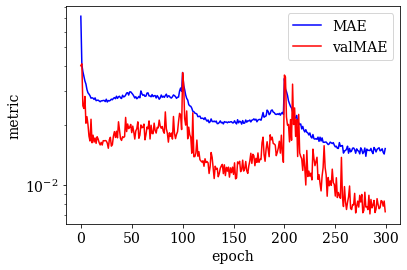

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


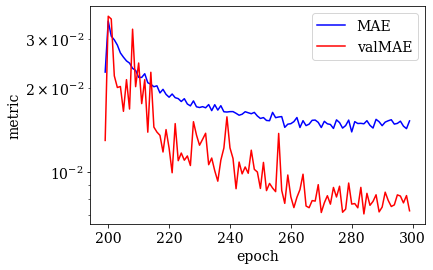

found 2546 stars.
60000/60000 - 0s


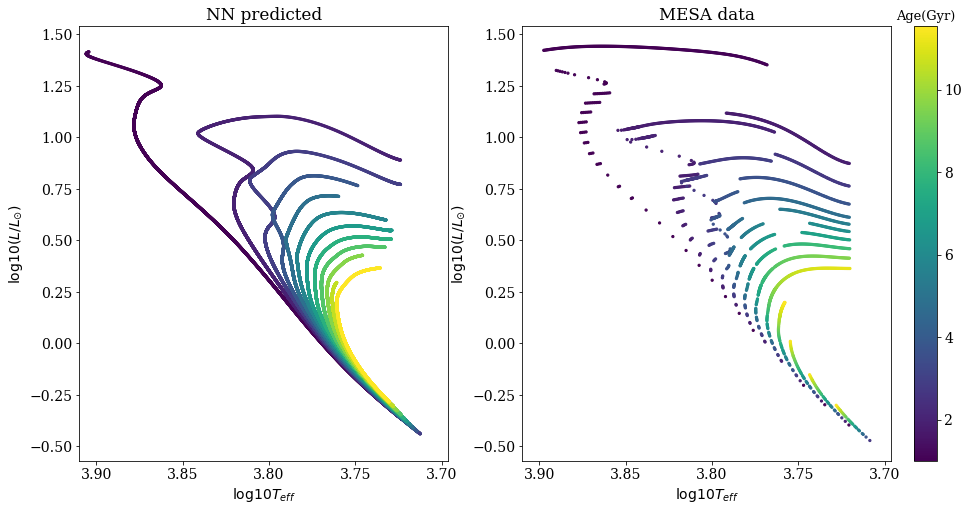

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.015235498
leg: 4/10
epochs of leg: 300, optimizer: Nadam, activation: elu
learning rate: 0.001, batch size: 2000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 13:12:30.822506 | Time elapsed=0:05:03.347614


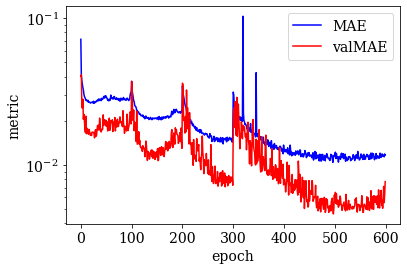

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


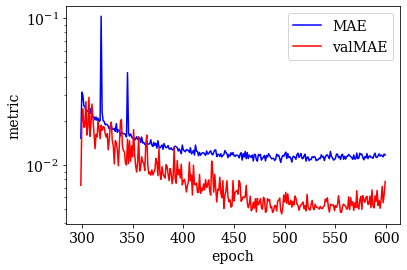

found 2546 stars.
60000/60000 - 0s


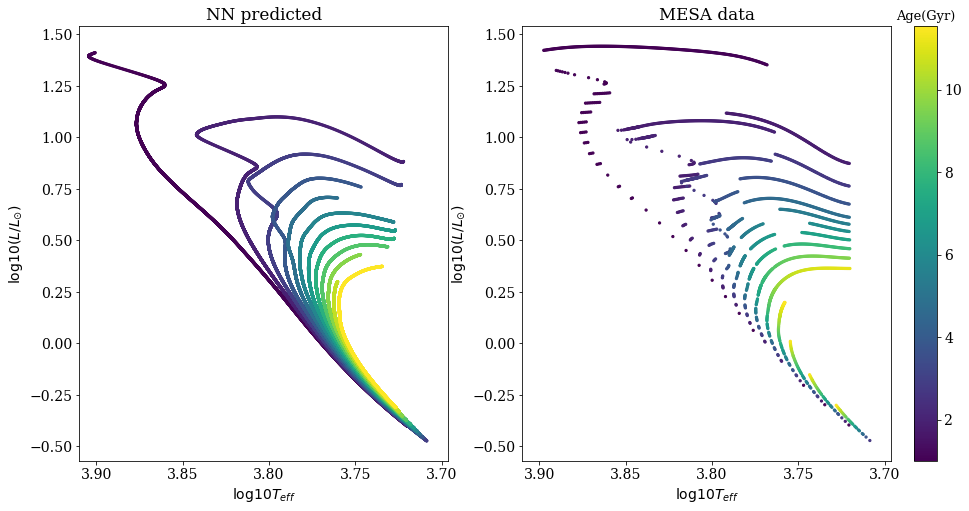

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.011685676
leg: 5/10
epochs of leg: 3000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 4000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 13:41:36.364840 | Time elapsed=0:28:44.093086


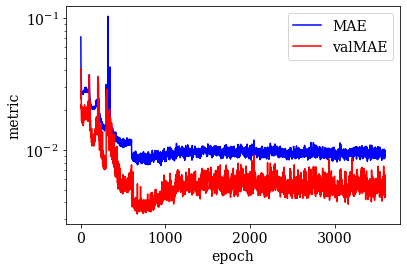

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


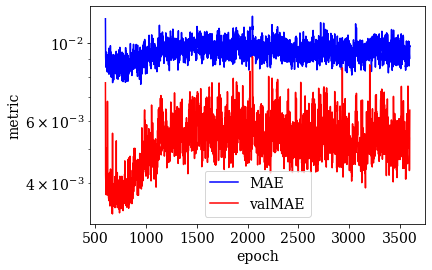

found 2546 stars.
60000/60000 - 0s


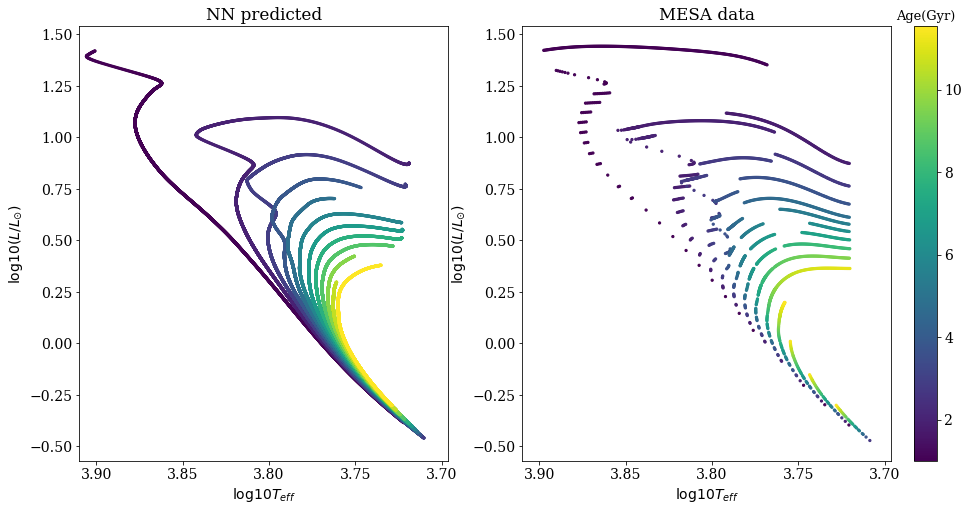

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.009757783
leg: 6/10
epochs of leg: 3000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 10000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 14:00:34.552359 | Time elapsed=0:18:32.309404


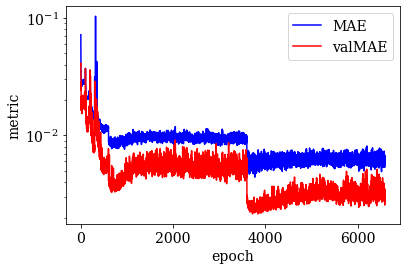

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


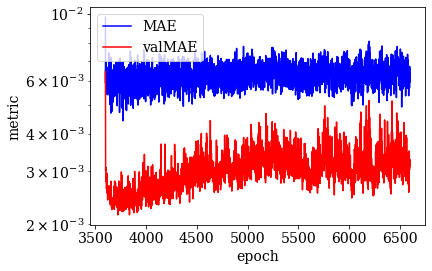

found 2546 stars.
60000/60000 - 1s


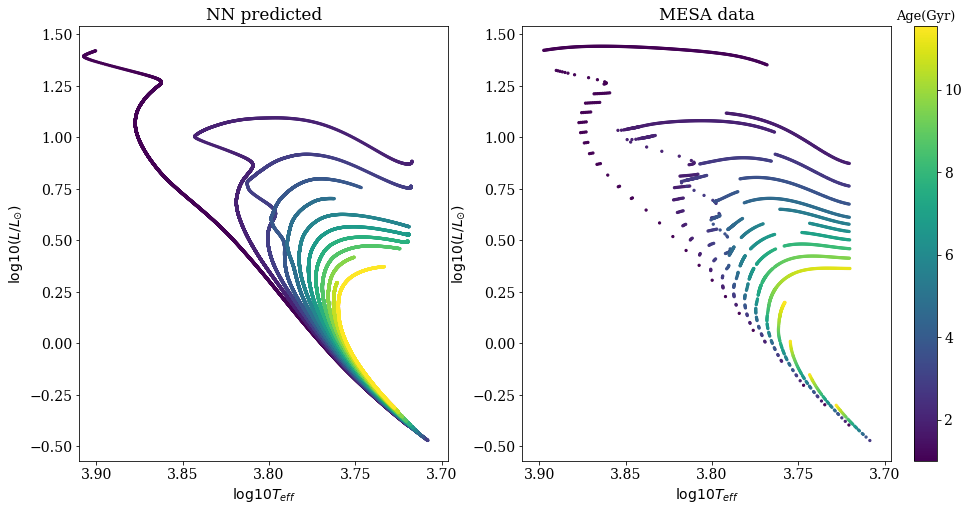

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.0063738218
leg: 7/10
epochs of leg: 3000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 20000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 14:16:28.037902 | Time elapsed=0:15:24.289624


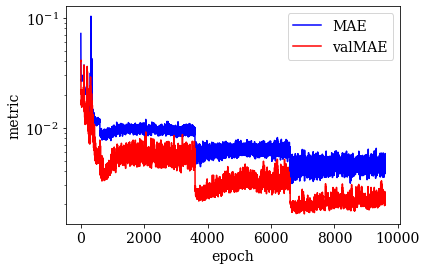

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


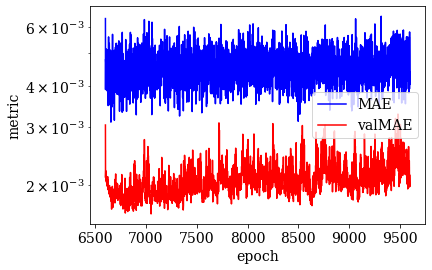

found 2546 stars.
60000/60000 - 1s


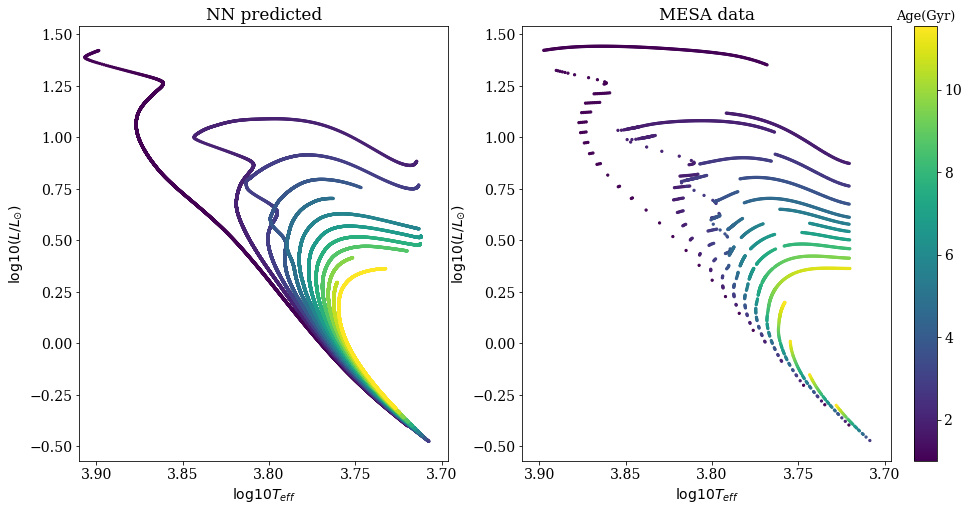

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.0043950016
leg: 8/10
epochs of leg: 3000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 40000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 14:30:53.463256 | Time elapsed=0:13:55.002880


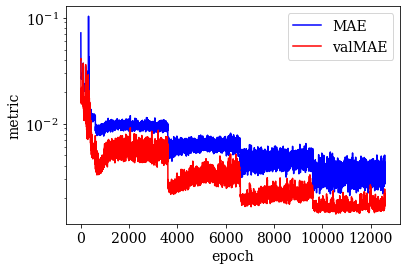

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


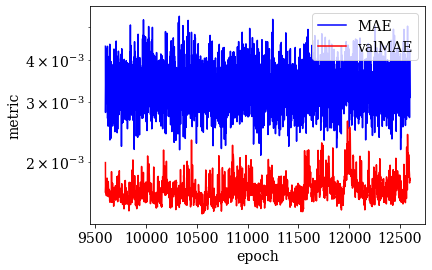

found 2546 stars.
60000/60000 - 1s


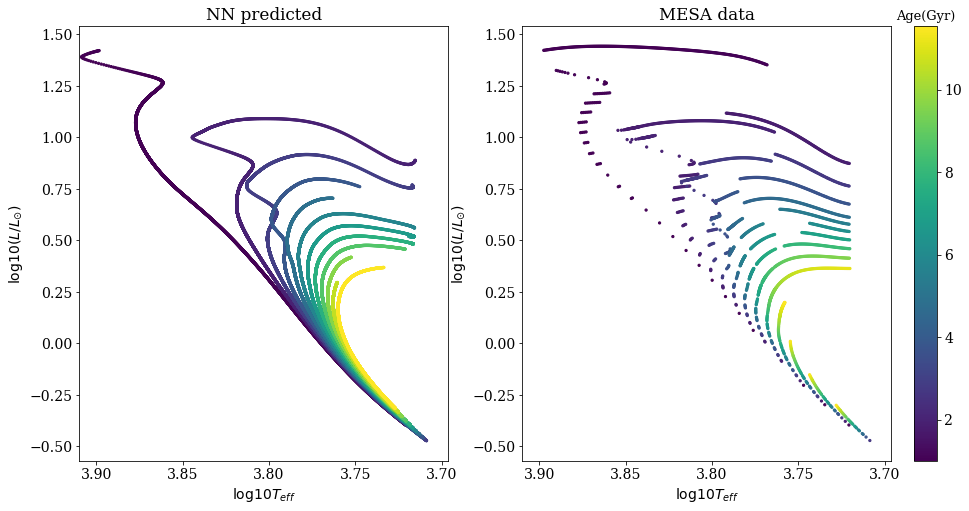

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.003102414
leg: 9/10
epochs of leg: 3000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 100000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 14:43:35.605230 | Time elapsed=0:12:08.797185


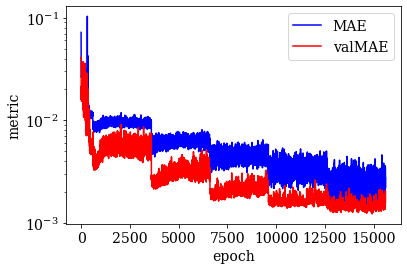

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


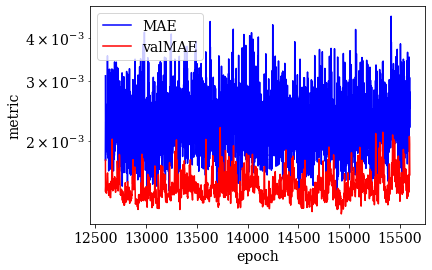

found 2546 stars.
60000/60000 - 1s


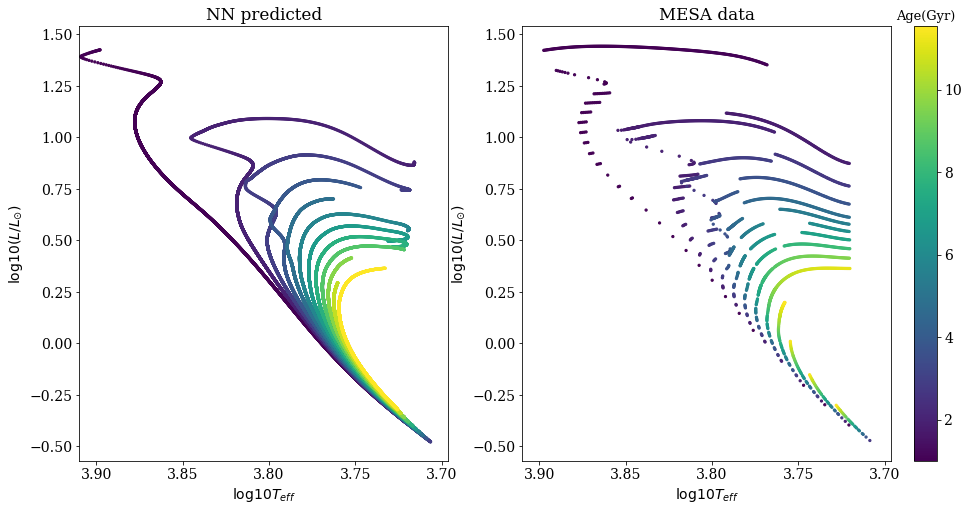

Isochrone saved as "drive/My Drive/4th Year Project/test3/Isotest3.png"
0.0027772146
leg: 10/10
epochs of leg: 8000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 200000, regularization: ['l2', 1e-06], dropout: None, mean error type: MAE
training done! now=2020-03-03 15:15:31.251660 | Time elapsed=0:31:19.252037


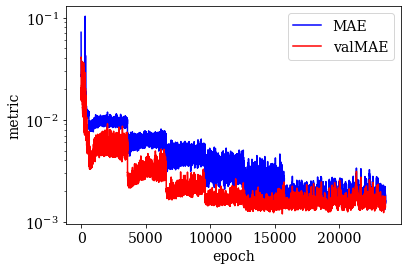

history plot saved as "drive/My Drive/4th Year Project/test3/historytest3.png"


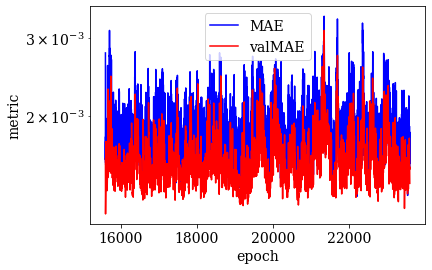

297088/297088 - 23s
297088/297088 - 32s - loss: 0.0015 - mean_absolute_error: 0.0012 - mean_squared_error: 5.2546e-06
28069/28069 - 0s
found 2546 stars.
60000/60000 - 5s
60000/60000 - 4s
297088/297088 - 0s


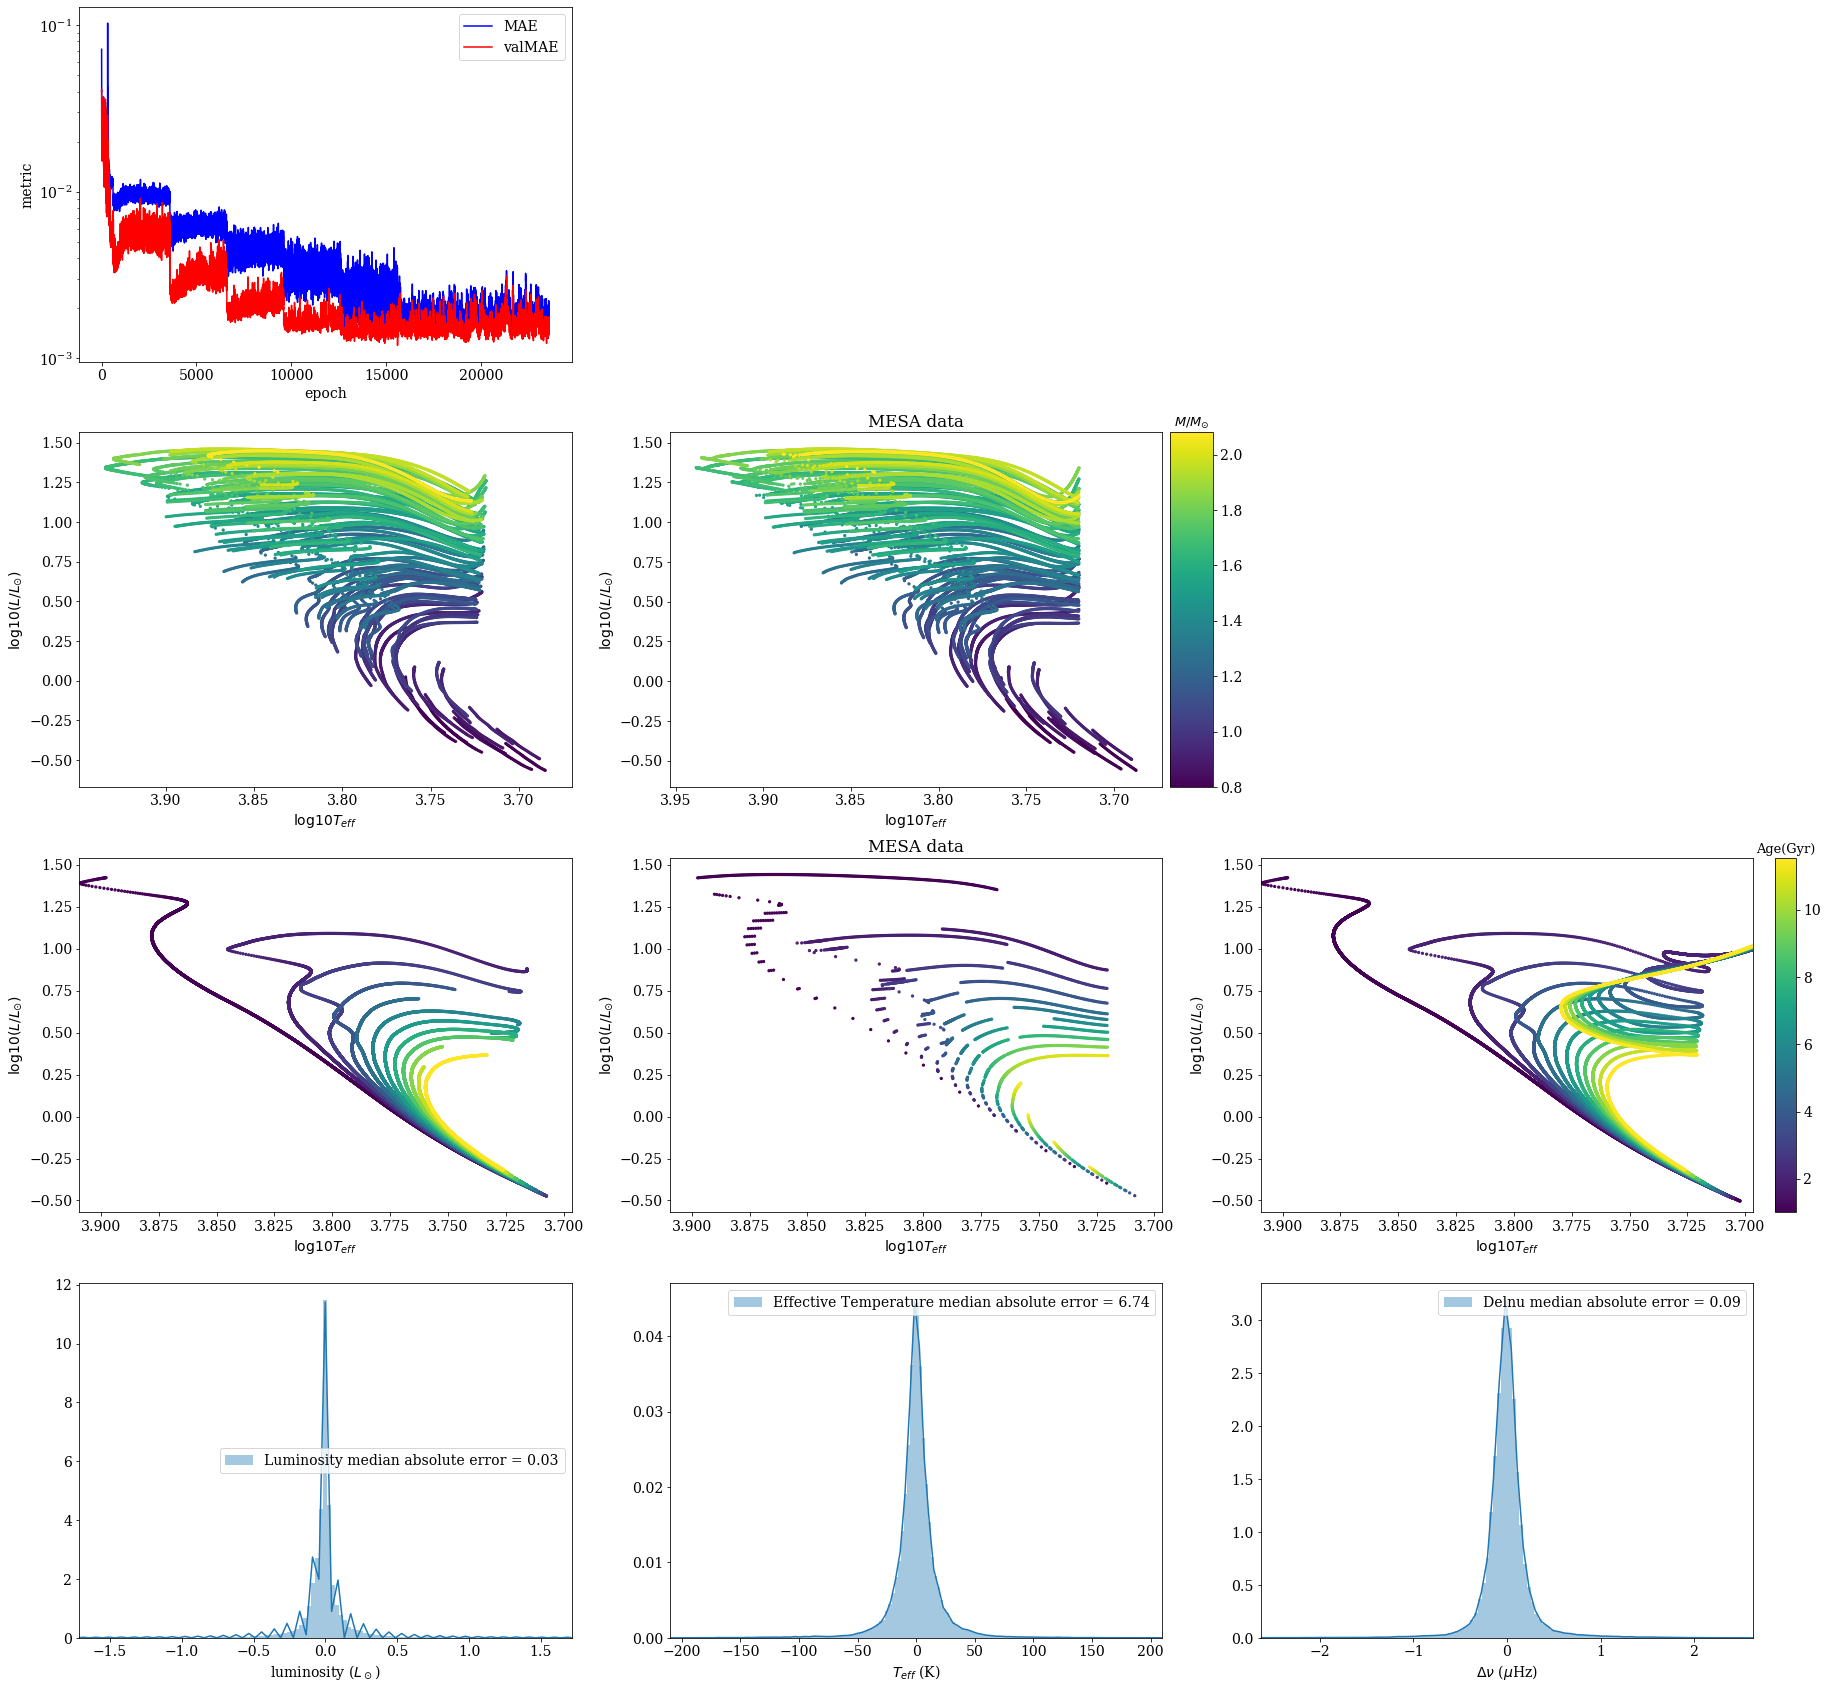

Multigraph saved as "drive/My Drive/4th Year Project/test3/Combotest3.png"
0.0015170712 0.0011935111 0.0005208453867172017 0.0031380142047170738 0.0024786312432677443


In [6]:
starttime = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
legs = Leg_Setup(folder_name=folder_name,reg=reg,lr=lr,epoch_no=epoch_no,batch_size=batch_size,opt=opt,activation=activation,dropout=dropout,momentum=momentum,decay=decay,mean_error_type=mean_error_type,recompile=recompile)

if load_RGB_only == True:
  grid_file='drive/My Drive/4th Year Project/grid2_trun_RGB.csv'
elif load_RGB_only == "EarlyType":
  grid_file='drive/My Drive/4th Year Project/grid2_trun_early.csv'
else:
  grid_file='drive/My Drive/4th Year Project/grid2_trun.csv'
df = pd.read_csv(grid_file)
#######################################
#df['tenfeh'] = 10**df.star_feh # not required because already in grid
df['scale_T'] = (df.effective_T/5000) #adds additional column for experimenting
#print(df.keys())

if poly_degree != None and poly_degree != 0:
  poly_coeffs = [[10.080063081738215],[-6.299335472415236, 10.242237170209801],[-610.7218017418816, 89.85671949554772, 6.774087565549949],[16905.40447207155, -4065.6311495554132, 310.3175291041117, 2.44531045264507],[-345325.91585290496, 100978.60207855009,-11247.38751663596,559.9266166206404,-0.4452098122376857],[5477893.169557465,-1707033.133164369,221636.15660754204,-15654.177988126563,611.5582474359531,-0.31834338820664926],[-59126555.07934094,14508309.859740352,-1343909.580772016,81996.14585277902,-6402.515077045019,381.599457896548,1.3749938813434033],[-699962035.405495,430765243.7904518,-94918092.71809113,9901554.35675961,-484555.0863223898,5291.626663393838,418.7372807820708,-2.140655448794895],[82146144833.0785,-36765444489.27007,6910120364.377735,-704557665.2236683,41556469.95754824,-1336030.766888207,13441.264472906618,499.11916033295904,-3.694128400005397],[-370270824412.91266,186712010232.51346,-36545123603.61212,3601962498.6247864,-184265308.92825338,3520460.454963947,151277.9849266049,-16126.529234488851,712.3937516064432,-3.048353222993039]] #list of lists of best fit coefficients for different degree polynomials for use in radius scaling of the RGB, poly_coeffs[0] contains the best fit coefficients for a linear fit e.g. y=mx
  radius_coeffs = poly_coeffs[poly_degree-1]
  Teffs = np.array(df['effective_T'].values.tolist())
  Delnus = np.array(df['delta_nu'].values.tolist())
  truths = np.logical_and(Teffs<10**3.72, Delnus<100)
  df['scale_radius'] = df['radius']/10**(NNmodel.polynomial(3.72-np.log10(df['effective_T']),radius_coeffs)*truths)
else:
  radius_coeffs = None

df = df.sample(frac=1).reset_index(drop=True)
NNmodel.set_seed = set_seed
print(len(df.index))
for leg in range(Get_Num_Legs_Trained(folder_name=folder_name,load_partially_trained_model=load_partially_trained_model),len(legs)):
    print("leg: {}/{}\nepochs of leg: {}, optimizer: {}, activation: {}\nlearning rate: {}, batch size: {}, regularization: {}, dropout: {}, mean error type: {}".format(leg+1,len(legs),legs[leg]['epoch_no'],legs[leg]['opt'],legs[leg]['activation'],legs[leg]['lr'],legs[leg]['batch_size'],legs[leg]['reg'],legs[leg]['dropout'],legs[leg]['mean_error_type'])) 
    start_epoch, m1 = NN_run(folder_name=folder_name, df=df, hidden_layers=hidden_layers, legs=legs, leg=leg)
    if leg == len(legs)-1:
      m1 = NN_results(last_leg = True, grid_file=grid_file,folder_name=folder_name, starttime=starttime,start_epoch=start_epoch, radius_coeffs=radius_coeffs)
    else:
      m1 = NN_results(last_leg = False, grid_file=grid_file,folder_name=folder_name, starttime=starttime,start_epoch=start_epoch, radius_coeffs=radius_coeffs)